In [1]:
import torch 
from medical_dataset import MedicalDataset
import matplotlib.pyplot as plt
from unet import UNet
import torchvision.transforms as transforms
from utilities import *

device = "cuda" if torch.cuda.is_available() else "cpu"


In [26]:

cust_transforms = [
    transforms.Resize((256,256)),
    #transforms.ColorJitter(0.5,0.5),
    #transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
    transforms.RandomVerticalFlip(1),
]

In [27]:
D_test1 = MedicalDataset(1, "data_test",cust_transforms)

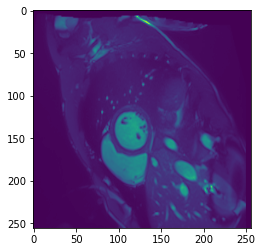

In [28]:
im = D_test1[100][0][0]
plt.imshow(im)
plt.imsave('figs/contrast.png', im)

In [29]:
def evaluate_rec(model_parse, transform, sigmoid):
    model = UNet(1,1)
    model.to(device)
    L = []
    for i in range(1,4):
        D_val = MedicalDataset(i, "data_test", transform)
        val_loader = torch.utils.data.DataLoader(
            D_val, batch_size=5, shuffle=False
        )
        model.load_state_dict(torch.load(model_parse.format(i)))
        model.eval()
        L.append(evaluate(model, val_loader, sigmoid).item())
    print('{} & {:.3f} & {:.3f} & {:.3f} & {:.3f} '.format(model_parse[-5:-3], L[0], L[1], L[2], (L[1]+L[2]+L[0])/3))
        
evaluate_rec('models/unet{}_CE.pt', cust_transforms, True)
evaluate_rec('models/unet{}_AC.pt', cust_transforms, False)


CE & 0.000 & 0.477 & 0.503 & 0.327 
AC & 0.005 & 0.210 & 0.172 & 0.129 
